2023-08-22 15:30:25.374976: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


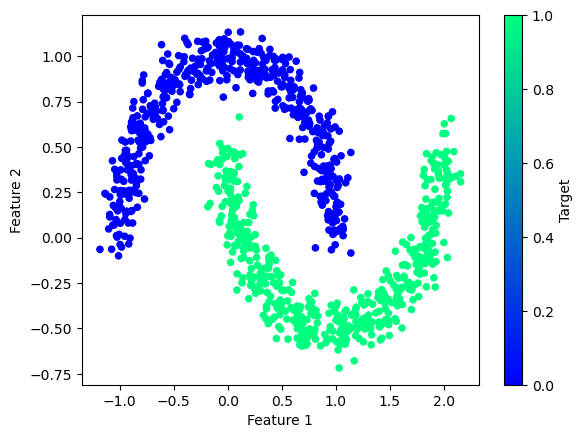

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")
plt.show()

In [2]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In the above example, we are trying out the number of neurons to see how it affects accuracy.

In [3]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [4]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.7357 - accuracy: 0.5307
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7293 - accuracy: 0.5307
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7239 - accuracy: 0.5307
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7194 - accuracy: 0.5307
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7155 - accuracy: 0.5307
Epoch 6/100
24/24 [==============================] - 0s 981us/step - loss: 0.7123 - accuracy: 0.5307
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7093 - accuracy: 0.5307
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7066 - accuracy: 0.5307
Epoch 9/100
24/24 [==============================] - 0s 990us/step - loss: 0.7044 - accuracy: 0.5307
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7025 - accuracy: 0.5307
Epoch

24/24 [==============================] - 0s 917us/step - loss: 0.3200 - accuracy: 0.8920
Epoch 83/100
24/24 [==============================] - 0s 953us/step - loss: 0.3186 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 896us/step - loss: 0.3171 - accuracy: 0.8933
Epoch 85/100
24/24 [==============================] - 0s 896us/step - loss: 0.3157 - accuracy: 0.8933
Epoch 86/100
24/24 [==============================] - 0s 957us/step - loss: 0.3143 - accuracy: 0.8947
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3130 - accuracy: 0.8947
Epoch 88/100
24/24 [==============================] - 0s 901us/step - loss: 0.3117 - accuracy: 0.8947
Epoch 89/100
24/24 [==============================] - 0s 885us/step - loss: 0.3105 - accuracy: 0.8947
Epoch 90/100
24/24 [==============================] - 0s 884us/step - loss: 0.3094 - accuracy: 0.8933
Epoch 91/100
24/24 [==============================] - 0s 889us/step - loss: 0.3082 - accuracy: 0.

In [5]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.3373 - accuracy: 0.8560 - 129ms/epoch - 16ms/step
Loss: 0.3373172879219055, Accuracy: 0.8560000061988831


In [6]:
# Create a new neural network model with 6 neurons
nn_model2 = tf.keras.models.Sequential()

nn_model2.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=2))

nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model2.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5068 - accuracy: 0.8053
Epoch 2/100
24/24 [==============================] - 0s 981us/step - loss: 0.4763 - accuracy: 0.8467
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.8560
Epoch 4/100
24/24 [==============================] - 0s 969us/step - loss: 0.4246 - accuracy: 0.8693
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8773
Epoch 6/100
24/24 [==============================] - 0s 953us/step - loss: 0.3827 - accuracy: 0.8853
Epoch 7/100
24/24 [==============================] - 0s 996us/step - loss: 0.3650 - accuracy: 0.8880
Epoch 8/100
24/24 [==============================] - 0s 976us/step - loss: 0.3492 - accuracy: 0.8880
Epoch 9/100
24/24 [==============================] - 0s 939us/step - loss: 0.3350 - accuracy: 0.8893
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3230 - accuracy: 0.88

24/24 [==============================] - 0s 1ms/step - loss: 0.1811 - accuracy: 0.9227
Epoch 83/100
24/24 [==============================] - 0s 911us/step - loss: 0.1798 - accuracy: 0.9240
Epoch 84/100
24/24 [==============================] - 0s 968us/step - loss: 0.1783 - accuracy: 0.9253
Epoch 85/100
24/24 [==============================] - 0s 889us/step - loss: 0.1769 - accuracy: 0.9280
Epoch 86/100
24/24 [==============================] - 0s 947us/step - loss: 0.1759 - accuracy: 0.9280
Epoch 87/100
24/24 [==============================] - 0s 946us/step - loss: 0.1742 - accuracy: 0.9280
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1730 - accuracy: 0.9280
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1716 - accuracy: 0.9280
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1702 - accuracy: 0.9280
Epoch 91/100
24/24 [==============================] - 0s 924us/step - loss: 0.1688 - accuracy: 0.9280
E

In [7]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1820 - accuracy: 0.9080 - 93ms/epoch - 12ms/step
Loss: 0.18196839094161987, Accuracy: 0.9079999923706055


# Jon's Notes

#### Not in school notes

Since this model is a classifier, we are plotting it to see how it looks like on a visualization.

In [8]:
import matplotlib.pyplot as plt

In [9]:
predictions = nn_model2.predict(X_test_scaled)

8/8 [==============================] - 0s 1ms/step


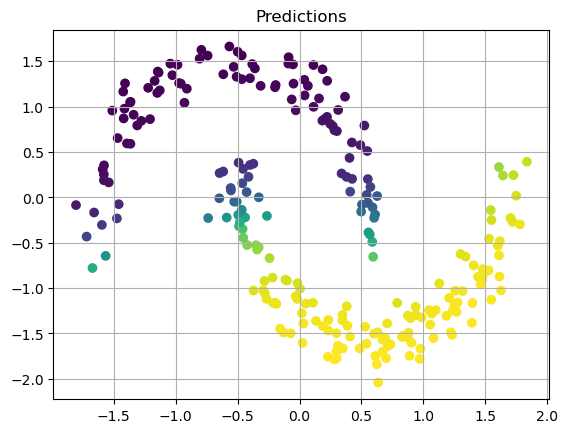

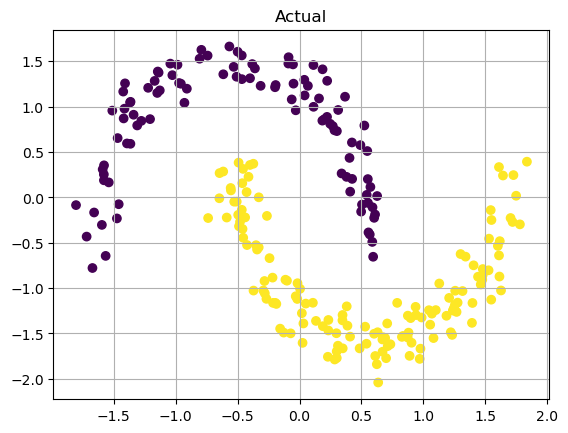

In [10]:
plt.figure("Predictions")
plt.title("Predictions")
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker="o", c=predictions)
plt.grid()

plt.figure("Actual")
plt.title("Actual")
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker="o", c=y_test)
plt.grid()
plt.show()

In [11]:
# Why there is a gradient of colors in the visualization?
predictions

array([[0.0063356 ],
       [0.9577553 ],
       [0.01012958],
       [0.0263127 ],
       [0.98305124],
       [0.00603529],
       [0.01922081],
       [0.9865648 ],
       [0.01043508],
       [0.16080827],
       [0.9668908 ],
       [0.96460634],
       [0.14459746],
       [0.94655097],
       [0.9702396 ],
       [0.9699852 ],
       [0.00980607],
       [0.98541826],
       [0.06076194],
       [0.9909303 ],
       [0.14807945],
       [0.93282396],
       [0.9513302 ],
       [0.00963966],
       [0.01741353],
       [0.98575824],
       [0.0202499 ],
       [0.99321187],
       [0.01897961],
       [0.13069093],
       [0.87276816],
       [0.9904747 ],
       [0.9807592 ],
       [0.9713811 ],
       [0.9863145 ],
       [0.9798574 ],
       [0.6208508 ],
       [0.9865455 ],
       [0.97796494],
       [0.9322336 ],
       [0.97246146],
       [0.01414653],
       [0.1494095 ],
       [0.98026097],
       [0.99367887],
       [0.99414647],
       [0.13834335],
       [0.011